In [1]:
import pandas as pd
df = pd.read_csv('rec_80.csv')
df

,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1
0,1980Q2,Pink Floyd,1.0,False,1.0,1,Another Brick In The Wall (Part II),12.0,6701.046
1,1980Q2,The Spinners,2.0,False,2.0,2,"Working My Way Back To You/Forgive Me, Girl",17.0,6701.046
2,1980Q2,Blondie,5.0,False,3.0,3,Call Me,8.0,6701.046
3,1980Q2,Queen,3.0,False,1.0,4,Crazy Little Thing Called Love,16.0,6701.046
4,1980Q2,Kool & The Gang,7.0,False,5.0,5,Too Hot,12.0,6701.046
...,...,...,...,...,...,...,...,...,...
1465,1980Q3,The Jacksons,71.0,False,45.0,45,Lovely One,2.0,6693.082
1466,1980Q3,Elton John,39.0,False,39.0,46,(Sartorial Eloquence) Don't Ya Wanna Play This...,9.0,6693.082
1467,1980Q3,"Ray, Goodman & Brown",47.0,False,47.0,47,My Prayer,7.0,6693.082
1468,1980Q3,The Rolling Stones,72.0,False,48.0,48,She's So Cold,2.0,6693.082


In [2]:
df['rank_gain/loss'] = df['track_lp'] - df['track_rank']
df.dropna(inplace=True)
df

,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1,rank_gain/loss
0,1980Q2,Pink Floyd,1.0,False,1.0,1,Another Brick In The Wall (Part II),12.0,6701.046,0.0
1,1980Q2,The Spinners,2.0,False,2.0,2,"Working My Way Back To You/Forgive Me, Girl",17.0,6701.046,0.0
2,1980Q2,Blondie,5.0,False,3.0,3,Call Me,8.0,6701.046,2.0
3,1980Q2,Queen,3.0,False,1.0,4,Crazy Little Thing Called Love,16.0,6701.046,-1.0
4,1980Q2,Kool & The Gang,7.0,False,5.0,5,Too Hot,12.0,6701.046,2.0
...,...,...,...,...,...,...,...,...,...,...
1465,1980Q3,The Jacksons,71.0,False,45.0,45,Lovely One,2.0,6693.082,26.0
1466,1980Q3,Elton John,39.0,False,39.0,46,(Sartorial Eloquence) Don't Ya Wanna Play This...,9.0,6693.082,-7.0
1467,1980Q3,"Ray, Goodman & Brown",47.0,False,47.0,47,My Prayer,7.0,6693.082,0.0
1468,1980Q3,The Rolling Stones,72.0,False,48.0,48,She's So Cold,2.0,6693.082,24.0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df, x="rank_gain/loss")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

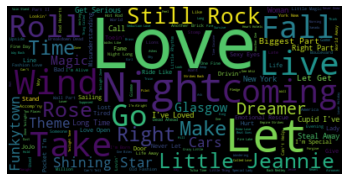

In [4]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
# Create stopword list:
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.track_title)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [5]:
df = df[df['rank_gain/loss'] != 0]
df['sentiment'] = df['rank_gain/loss'].apply(lambda rating : +1 if rating > 0 else -1)

C:\Users\java\AppData\Local\Temp\ipykernel_21604\701095560.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [6]:
df

,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1,rank_gain/loss,sentiment
2,1980Q2,Blondie,5.0,False,3.0,3,Call Me,8.0,6701.046,2.0,1
3,1980Q2,Queen,3.0,False,1.0,4,Crazy Little Thing Called Love,16.0,6701.046,-1.0,-1
4,1980Q2,Kool & The Gang,7.0,False,5.0,5,Too Hot,12.0,6701.046,2.0,1
6,1980Q2,Christopher Cross,9.0,False,7.0,7,Ride Like The Wind,8.0,6701.046,2.0,1
7,1980Q2,"Ray, Goodman & Brown",11.0,False,8.0,8,Special Lady,11.0,6701.046,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1464,1980Q3,Anne Murray,53.0,False,44.0,44,Could I Have This Dance,5.0,6693.082,9.0,1
1465,1980Q3,The Jacksons,71.0,False,45.0,45,Lovely One,2.0,6693.082,26.0,1
1466,1980Q3,Elton John,39.0,False,39.0,46,(Sartorial Eloquence) Don't Ya Wanna Play This...,9.0,6693.082,-7.0,-1
1468,1980Q3,The Rolling Stones,72.0,False,48.0,48,She's So Cold,2.0,6693.082,24.0,1


In [7]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

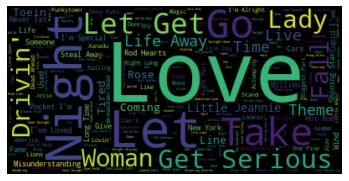

In [8]:
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.track_title)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

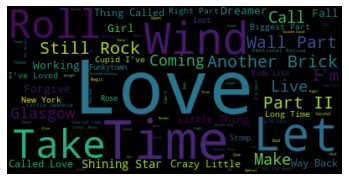

In [9]:
neg = " ".join(review for review in negative.track_title)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [10]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

C:\Users\java\AppData\Local\Temp\ipykernel_21604\1108073838.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\java\AppData\Local\Temp\ipykernel_21604\1108073838.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
df['track_title'].value_counts()[:8]

Shining Star                            17
Little Jeannie                          17
Let's Get Serious                       17
The Rose                                16
Cupid/I've Loved You For A Long Time    16
It's Still Rock And Roll To Me          16
Cars                                    15
Biggest Part Of Me                      15
Name: track_title, dtype: int64

In [12]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['track_title'] = df['track_title'].apply(remove_punctuation)
df = df.dropna(subset=['track_title'])

C:\Users\java\AppData\Local\Temp\ipykernel_21604\3186846728.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
dfNew = df[['track_title','sentiment']]
dfNew.head()

,track_title,sentiment
2,Call Me,1
3,Crazy Little Thing Called Love,-1
4,Too Hot,1
6,Ride Like The Wind,1
7,Special Lady,1


In [14]:
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['track_title'])
test_matrix = vectorizer.transform(test['track_title'])

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [17]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [18]:
lr.fit(X_train,y_train)

LogisticRegression()

In [19]:
predictions = lr.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 17,   9],
       [ 54, 198]], dtype=int64)

In [21]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.24      0.65      0.35        26
           1       0.96      0.79      0.86       252

    accuracy                           0.77       278
   macro avg       0.60      0.72      0.61       278
weighted avg       0.89      0.77      0.81       278

